## Lideando con los datos

La primera parte de este proyecto se basara en entender y lidear con los datos que presentan nuestras bases de datos, a saber, los archivos train y test. Para esto primero tenemos que definir las librerias que vayamos a usar en esta parte. Se iran agregando las librerias cada vez que las usemos:

In [1]:
#Primeros paquetes
import pandas as pd #importaremos panda para leer los arvhivos csv
import numpy as np

#Segundos paquetes
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette
sns.set_style('darkgrid')

from scipy import stats
from scipy.stats import norm, skew

#Tercer paquete
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

#Cuarto paquete
from sklearn.ensemble import IsolationForest
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

Con la libreria pandas, tenemos material para analizar de manera profunda los archivos. Para esto primero leemos y definimos nuestras bases de datos

In [2]:
dbtrain = pd.read_csv("train.csv",sep=',',header='infer')
train_ID = dbtrain['Id']
train = dbtrain.drop('Id',1) #quitamos la fila de ID
train.head(3) #nos da una previsualizacion de las primeras tres filas de nuestros datos.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


Nuestra base de datos tiene tamaño

In [3]:
train.shape

(1460, 80)

Lo mimso hacemos con la base test

In [4]:
dbtest = pd.read_csv("test.csv",sep=',',header='infer')
test_ID = dbtest['Id']
test = dbtest.drop('Id',axis=1) #quitamos la fila de ID
test #nos da una previsualizacion de las primeras tres filas de nuestros datos.

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Sabemos que hay que predecir la columna SalePrice. Veamos como se comporta

In [5]:
(mu,sigma)=norm.fit(train['SalePrice'])
print(mu,sigma)

180921.19589041095 79415.29188606751


Text(0.5, 1.0, 'Distribución para SalePrice')

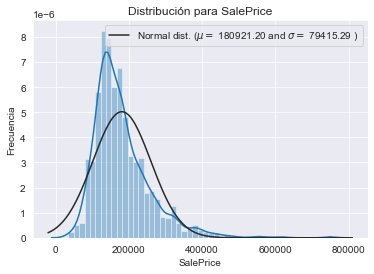

In [6]:
sns.distplot(train['SalePrice'], fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución para SalePrice')

Esta manera de distribución de los datos no nos sirve para las regresiones. Mientras menos sesgados los datos mejor predicción dará. Así que aplicamos el metodo de log para 'aplanar' un poco la distribución y esto se hace con la libreria numpy

In [7]:
train['SalePrice']=np.log1p(train['SalePrice'])

y vemos cómo se comporta esta nueva distribución

Text(0.5, 1.0, 'Distribución para SalePrice')

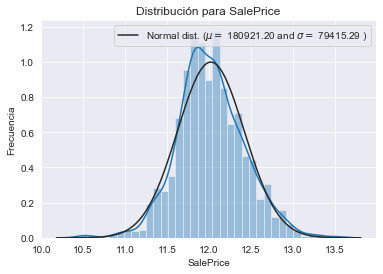

In [8]:
sns.distplot(train['SalePrice'], fit=norm);
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frecuencia')
plt.title('Distribución para SalePrice')

en donde ahora

In [9]:
(mu,sigma)=norm.fit(train['SalePrice'])
print(mu,sigma)

12.024057394918406 0.39931245219387496


es decir, ahora la distribución de los presios se parece mas a una normal con media = mu =12.02 y varianza = sigma =.4, Y esta distribución de los datos nos servirá para dar una mejor regresión.
Ahora lideamos con los valores faltantes (missing data). La primer forma de acercarse a esto es haciendo todos los valores que harán saltar errores 0. Esto es para valores como NaN o infinitos. Esto se hace con

Para terminar, convertimos todos los valores de tipo string en valores numéricos

In [10]:
le = preprocessing.LabelEncoder()
prep = train.dtypes.eq(np.object)
train.loc[:, prep] = train.loc[:, prep].astype(str).apply(le.fit_transform)

checamos si queda algun valor faltante

In [11]:
#Checar si existen missing data faltantes (Nan, inf)
train_na = (train.isnull().sum() / len(train)) * 100
train_na = train_na.drop(train_na[train_na == 0].index).sort_values(ascending=False)
missing_data = pd.DataFrame({'Missing Ratio' :train_na})
missing_data.head()

,Missing Ratio
LotFrontage,17.739726
GarageYrBlt,5.547945
MasVnrArea,0.547945


hacemos los valores faltantes cero

In [12]:
train = train.fillna(0)

de igual manera podemos checarlo con el test.

In [13]:
train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,12.247699
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,12.109016
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,12.317171
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,11.849405
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,12.429220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,2,3,3,0,4,...,0,3,4,4,0,8,2007,8,4,12.072547
1456,20,3,85.0,13175,1,2,3,3,0,4,...,0,3,2,4,0,2,2010,8,4,12.254868
1457,70,3,66.0,9042,1,2,3,3,0,4,...,0,3,0,2,2500,5,2010,8,4,12.493133
1458,20,3,68.0,9717,1,2,3,3,0,4,...,0,3,4,4,0,4,2010,8,4,11.864469


lo mismo con el test

In [14]:
prep = test.dtypes.eq(np.object)
test.loc[:, prep] = test.loc[:, prep].astype(str).apply(le.fit_transform)

In [15]:
test = test.fillna(0)

In [16]:
test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,2,3,3,0,4,...,120,0,2,2,3,0,6,2010,8,4
1,20,3,81.0,14267,1,2,0,3,0,0,...,0,0,2,4,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,2,0,3,0,4,...,0,0,2,2,3,0,3,2010,8,4
3,60,3,78.0,9978,1,2,0,3,0,4,...,0,0,2,4,3,0,6,2010,8,4
4,120,3,43.0,5005,1,2,0,1,0,4,...,144,0,2,4,3,0,1,2010,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,4,21.0,1936,1,2,3,3,0,4,...,0,0,2,4,3,0,6,2006,8,4
1455,160,4,21.0,1894,1,2,3,3,0,4,...,0,0,2,4,3,0,4,2006,8,0
1456,20,3,160.0,20000,1,2,3,3,0,4,...,0,0,2,4,3,0,9,2006,8,0
1457,85,3,62.0,10441,1,2,3,3,0,4,...,0,0,2,2,2,700,7,2006,8,4


In [17]:
precios = pd.DataFrame({"price":train["SalePrice"]})
train = train.drop('SalePrice',1)
dbunion = pd.concat([train,test])
dbunion.shape

(2919, 79)

## Outliers

Para quitar los outliers usamos Insolation Forest de sklearn

In [18]:
# identify outliers in the training dataset
iso = IsolationForest(contamination=0.1, n_estimators=1000,max_features=79)
iso.fit(dbunion)
#dbunion
dbunion['iforest'] = pd.Series(iso.predict(dbunion))
dbunion['iforest'] = dbunion['iforest'].map({1:0,-1:1})
print(dbunion['iforest'].value_counts())

0    2619
1     300
Name: iforest, dtype: int64


In [19]:
dbunion.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,iforest
0,60,3,65.0,8450,1,2,3,3,0,4,...,0,3,4,4,0,2,2008,8,4,0
1,20,3,80.0,9600,1,2,3,3,0,2,...,0,3,4,4,0,5,2007,8,4,0
2,60,3,68.0,11250,1,2,0,3,0,4,...,0,3,4,4,0,9,2008,8,4,0
3,70,3,60.0,9550,1,2,0,3,0,0,...,0,3,4,4,0,2,2006,8,0,0
4,60,3,84.0,14260,1,2,0,3,0,2,...,0,3,4,4,0,12,2008,8,4,0


con esto estamos listos para hacer las regresiones

In [20]:
lst = []
for col in dbunion.columns[:-1]:
    norm = pd.Series.to_dict(dbunion[dbunion.iforest == 0][col].value_counts())
    anom = pd.Series.to_dict(dbunion[dbunion.iforest == 1][col].value_counts())
    
    keys = set(anom.keys())
    
    if keys:
        lst.append(col)

In [21]:
lst

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [25]:
norm = pd.Series.to_dict(dbunion[dbunion.iforest == 0].type.value_counts())
anom = pd.Series.to_dict(dbunion[dbunion.iforest == 1].type.value_counts())

AttributeError: 'DataFrame' object has no attribute 'type'

In [32]:
anom

{4: 231, 0: 38, 5: 30, 3: 8, 2: 8, 1: 3}

# Regresiones

## Modelo de regresión lineal

Se hace la prediccion con el modelo de regresión lineal más la gráfica

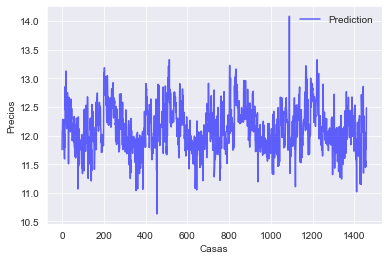

In [27]:
lr = LinearRegression()
lr.fit(train, precios)
plt.plot(test.index , lr.predict(test),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Casas')
plt.ylabel('Precios')
plt.show()

Luego se hace una tabla con las predicciones (dada la transformación) y con el precio real predicho

In [61]:
def format(x):
        return "${:.3f}K".format(x/1000)


index1 = pd.Series(test_ID).array
salida1= pd.DataFrame(lr.predict(test), index=index1)
salida1['RSP'] = np.exp(salida1[0])
salida1.rename(columns={0:'Predicción',
                          'RSP':'SalePrice'}, 
                 inplace=True)
salida1.index
salidabien1 =salida1.drop('Predicción',1)
salidabien1.rename(columns={1:'ID'})
salidabien1.to_csv("salidabien1.csv")

salidabien1

,SalePrice
1461,127171.030972
1462,173004.704637
1463,182850.497028
1464,215732.996635
1465,202436.464775
...,...
2915,104493.244994
2916,94226.185358
2917,171170.761671
2918,128577.956836


este modelo tuvo un score de 0.16846 al subirlo al Kaggle.

# Modelo Lasso

Se hace la prediccion con el modelo Lasso más la gráfica

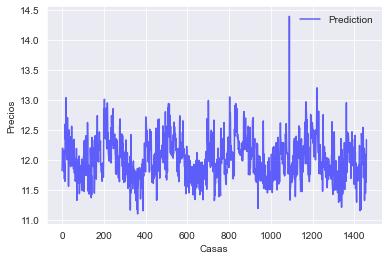

In [20]:
lm = Lasso(alpha=0.5) #normalize=True, max_iter=1e6)
lm.fit(train,precios)
plt.plot(test.index , lm.predict(test),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Casas')
plt.ylabel('Precios')
plt.show()

Luego se hace una tabla con las predicciones (dada la transformación) y con el precio real predicho

In [65]:
index2 = pd.Series(test_ID).array
salida2= pd.DataFrame(lm.predict(test), index=index2)
salida2['RSP'] = np.exp(salida2[0])
salida2.rename(columns={0:'Predicción',
                          'RSP':'SalePrice'}, 
                 inplace=True)
salida2.index 
salidabien2 =salida2.drop('Predicción',1)
salidabien2.rename(columns={1:'ID'})
salidabien2.to_csv("salidabien2.csv")

salidabien2

,SalePrice
1461,136278.812631
1462,149179.899976
1463,198114.051840
1464,198102.597431
1465,171853.647255
...,...
2915,93797.051421
2916,116554.761080
2917,179608.231306
2918,112694.223146


este modelo tuvo un score de 0.18812 al subirlo al Kaggle.

# Modelo Ridge

Se hace la prediccion con el modelo Ridge más la gráfica

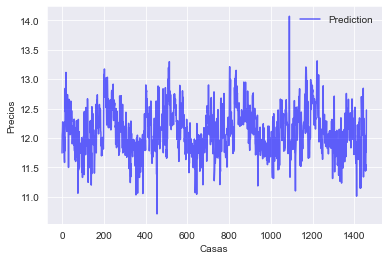

In [23]:
rm = Ridge(alpha=0.5)
rm.fit(train, precios)
plt.plot(test.index, rm.predict(test),'b',alpha=0.6, label='Prediction')
plt.legend(loc='best', frameon=False)
plt.xlabel('Casas')
plt.ylabel('Precios')
plt.show()

Luego se hace una tabla con las predicciones (dada la transformación) y con el precio real predicho

In [66]:
index3 = pd.Series(test_ID).array
salida3= pd.DataFrame(rm.predict(test), index=index3)
salida3['RSP'] = np.exp(salida3[0])
salida3.rename(columns={0:'Predicción',
                          'RSP':'SalePrice'}, 
                 inplace=True)
salida3.index 
salidabien3 =salida3.drop('Predicción',1)
salidabien3.rename(columns={1:'ID'})
salidabien3.to_csv("salidabien3.csv")

salidabien3

,SalePrice
1461,125827.902704
1462,171178.509206
1463,181115.821506
1464,213567.111608
1465,200164.769273
...,...
2915,103387.842601
2916,93258.665043
2917,169416.350406
2918,127119.130579


este modelo tuvo un score de 0.16278 al subirlo al Kaggle.

## Observaciones

Se observa que los tres modelos usados para predecir los datos tienen resultados parecidos. Todos los test en Kaggle salieron cerca de cero. Eso nos dice que hicimos una buena predicción respecto al concurso 

## Conclusiones

En estre proyecto desarrolle habilidades como
- Limpieza de Base de datos
- Grafica de las estadísticas de los datos
- Distinguir tipos de datos
- Aplicar modelos de regresion
- Armar bases de datos con los datos que necesito

luego estas habilidades ayudarán en proyectos futuros, así como en el análisis más profundo de estos.